**Content:** This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them.

1)age
2)sex
3)chest pain type (4 values)
4)resting blood pressure
5)serum cholestoral in mg/dl
6)fasting blood sugar > 120 mg/dl
7)resting electrocardiographic results (values 0,1,2)
8)maximum heart rate achieved
9)exercise induced angina
10)oldpeak = ST depression induced by exercise relative to rest
11)the slope of the peak exercise ST segment
12)number of major vessels (0-3) colored by flourosopy
13)thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14)The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

***Importing libraries***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

***Importing Data***

In [2]:
df = pd.read_csv("../input/heart-disease-dataset/heart.csv")

***Overview of data***

**(1) First 10 rows**

In [3]:
print(df.head(10))

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   
5   58    0   0       100   248    0        0      122      0      1.0      1   
6   58    1   0       114   318    0        2      140      0      4.4      0   
7   55    1   0       160   289    0        0      145      1      0.8      1   
8   46    1   0       120   249    0        0      144      0      0.8      2   
9   54    1   0       122   286    0        0      116      1      3.2      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0 

**(2) Last 10 rows**

In [4]:
print(df.tail(10))

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1015   58    1   0       128   216    0        0      131      1      2.2   
1016   65    1   3       138   282    1        0      174      0      1.4   
1017   53    1   0       123   282    0        1       95      1      2.0   
1018   41    1   0       110   172    0        0      158      0      0.0   
1019   47    1   0       112   204    0        1      143      0      0.1   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
1015      1   3     3       0  
1016      1   1     2       0  
1017      1   2     3       0  
1018      2   0     3   

**(3) Column names**

In [5]:
print(df.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


**(4) Number of rows and columns**

In [6]:
print(df.shape)
print("Number of rows: " + str(df.shape[0])) #number of rows
print("Number of columns: " + str(df.shape[1])) #number of columns

(1025, 14)
Number of rows: 1025
Number of columns: 14


**(5) Basic information**

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


***Cleaning data***

**(1) Check null values**

In [8]:
print(df.isnull())

        age    sex     cp  trestbps   chol    fbs  restecg  thalach  exang  \
0     False  False  False     False  False  False    False    False  False   
1     False  False  False     False  False  False    False    False  False   
2     False  False  False     False  False  False    False    False  False   
3     False  False  False     False  False  False    False    False  False   
4     False  False  False     False  False  False    False    False  False   
...     ...    ...    ...       ...    ...    ...      ...      ...    ...   
1020  False  False  False     False  False  False    False    False  False   
1021  False  False  False     False  False  False    False    False  False   
1022  False  False  False     False  False  False    False    False  False   
1023  False  False  False     False  False  False    False    False  False   
1024  False  False  False     False  False  False    False    False  False   

      oldpeak  slope     ca   thal  target  
0       False  Fal

In [9]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


**(2) Check duplicate values and drop them**

In [10]:
print(df.duplicated().any())

True


In [11]:
print(df.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool


In [12]:
df_no_dup = df.drop_duplicates()
print(df_no_dup)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    1   0       125   212    0        1      168      0      1.0   
1     53    1   0       140   203    1        0      155      1      3.1   
2     70    1   0       145   174    0        1      125      1      2.6   
3     61    1   0       148   203    0        1      161      0      0.0   
4     62    0   0       138   294    1        1      106      0      1.9   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
723   68    0   2       120   211    0        0      115      0      1.5   
733   44    0   2       108   141    0        1      175      0      0.6   
739   52    1   0       128   255    0        1      161      1      0.0   
843   59    1   3       160   273    0        0      125      0      0.0   
878   54    1   0       120   188    0        1      113      0      1.4   

     slope  ca  thal  target  
0        2   2     3       0  
1        0   0     3     

***Analysis of data***

**(1) Overview of statistics**

In [13]:
print(df_no_dup.describe())

             age         sex          cp    trestbps        chol         fbs  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.602649  246.500000    0.149007   
std      9.04797    0.466426    1.032044   17.563394   51.753489    0.356686   
min     29.00000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.00000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.50000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.00000    1.000000    2.000000  140.000000  274.750000    0.000000   
max     77.00000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490  149.569536    0.327815    1.043046    1.397351    0.718543   
std      0.526027   22.903527    0.4

**(2) Heat-map showing correlation between variables**

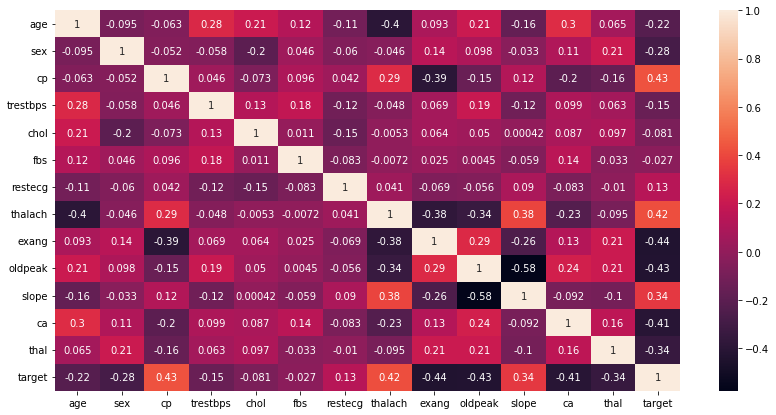

In [14]:
plt.figure(figsize=(14,7))
sns.heatmap(df_no_dup.corr(), annot= True)
plt.show()

**(3) How many have heart disease**

In [15]:
print(df_no_dup['target'].value_counts())

1    164
0    138
Name: target, dtype: int64


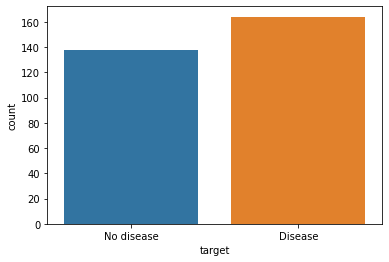

In [16]:
sns.countplot(x="target", data=df_no_dup)
plt.xticks([0,1],["No disease","Disease"])
plt.show()

**(2) How many males and females**

In [17]:
print(df_no_dup['sex'].value_counts())

1    206
0     96
Name: sex, dtype: int64


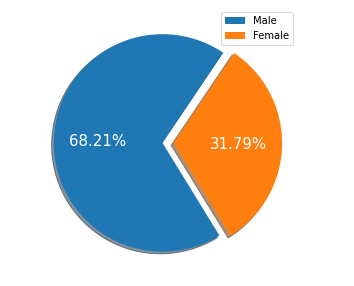

In [18]:
plt.figure(figsize=(5,5))
plt.pie(df_no_dup.value_counts("sex"), labels=["Male","Female"], explode=(0, 0.1), autopct="%.2f%%", textprops={"fontsize":15, "color":"w"}, shadow=True, startangle=56)
plt.legend()
plt.show()

**(3) Sex distribution in terms of possibility of heart attack(target)**

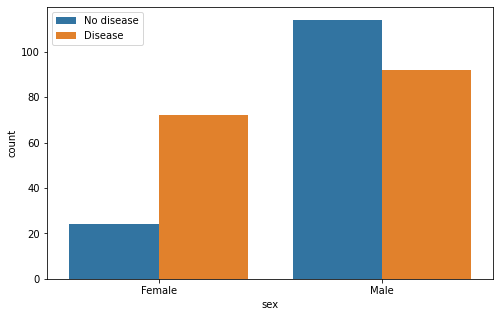

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(x="sex", hue="target", data=df_no_dup)
plt.xticks([0,1], ["Female","Male"])
plt.legend(labels=["No disease","Disease"], loc="upper left")
plt.show()

**(4) Age distribution**

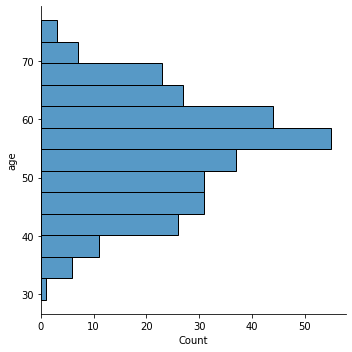

In [20]:
sns.displot(y="age", data=df_no_dup, kind="hist")
plt.show()

**(5) Chest pain counts**

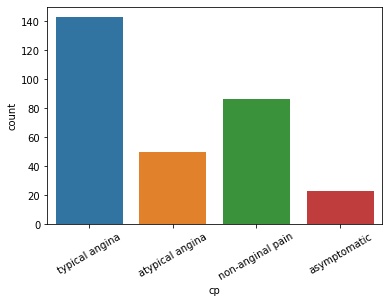

In [21]:
sns.countplot(x="cp", data=df_no_dup)
plt.xticks([0,1,2,3], ["typical angina", "atypical angina", "non-anginal pain", "asymptomatic"], rotation= 30)
plt.show()

**(6) Patients with asymptomatic chest pain**

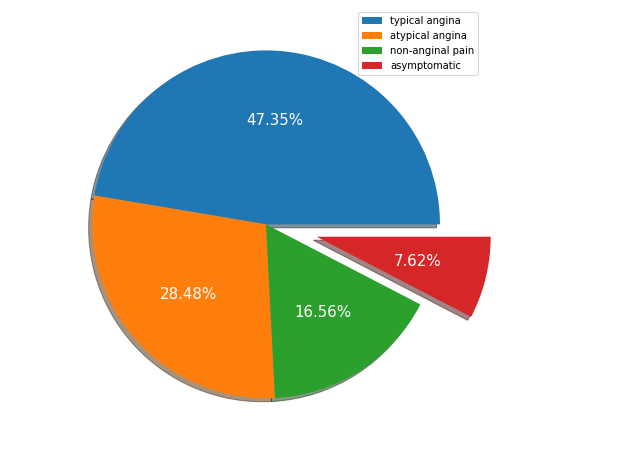

In [22]:
plt.figure(figsize=(8,8))
plt.pie(df_no_dup.value_counts("cp"), labels=["typical angina", "atypical angina", "non-anginal pain", "asymptomatic"], autopct="%.2f%%", textprops={"fontsize":15, "color":"w"}, explode=[0, 0, 0, 0.3], shadow=True)
plt.legend()
plt.show() 

**(7) Dristribution of resting blood pressure**

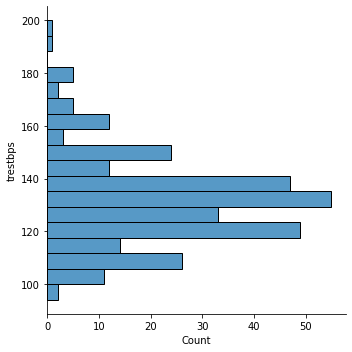

In [23]:
sns.displot(y="trestbps", data=df_no_dup, kind="hist")
plt.show()

**(8) Fasting blood sugar in terms of possibility of heart attack**

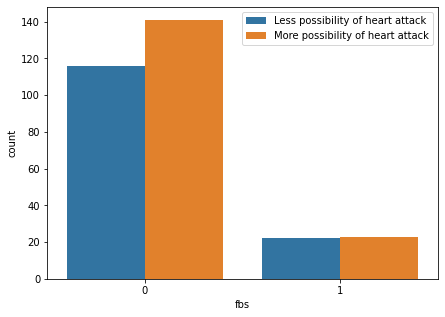

In [24]:
plt.figure(figsize=(7, 5))
sns.countplot(x="fbs", hue="target", data=df_no_dup)
plt.legend(labels=["Less possibility of heart attack","More possibility of heart attack"], loc="upper right")
plt.show()

**(8) Compare resting blood pressure as per sex column**

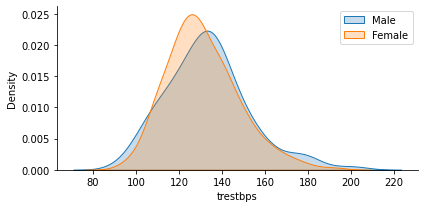

In [25]:
g= sns.FacetGrid(data=df_no_dup, hue="sex", aspect=2)
g.map(sns.kdeplot, "trestbps", shade=True)
plt.legend(labels=["Male", "Female"])
plt.show()